# Dataset
Dataset merupakan data mobil bekas yang terdapat di India dan diperoleh dari kaggle yang sedikit dimodifikasi. Dataset dapat diunduh melalui bit.ly/seleksiDSA. Terdapat 6019 baris dan 12 kolom dalam dataset tersebut. Kolom yang terdapat pada dataset meliputi :
-	Name – Nama merek dan model mobil.
-	Location – Lokasi mobil dijual.
-	Year – Tahun edisi mobil.
-	Kilometers_Driven – Total jarak pemakaian mobil oleh pengguna sebelumnya dalam satuan kilometer.
-	Fuel_Type – Tipe bahan bakar yang digunakan mobil.
-	Transmission – Tipe transmisi yang digunakan mobil.
-	Owner_Type – Jenis kepemilikan mobil.
-	Mileage – Tingkat konsumsi bahan bakar dalam satuan kmpl atau km/kg.
-	Engine – Kapasitas mesin mobil dalam satuan CC.
-	Power – Total tenaga pada mobil dalam bhp.
-	Seats – Jumlah kursi pada mobil.
-	Price – Harga mobil bekas dalam satuan INR Lakhs (Indian Rupee).

# Tugas dan Langkah
Pada dataset ini, saya ditugaskan untuk mencari informasi penting dari dari dataset yang diberikan. Setelah ditelaah lebih lanjut, akan dilanjutkan dengan menganalisis komponen dalam data yang memiliki hubungan untuk mendapatkan insight lebih dalam.

# Library yang Digunakan
###### Pandas
Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
###### Matplotlib
Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
###### Seaborn
Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.
###### Scikit-Learn
Scikit-learn adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.
###### Re
Modul python yang berkaitan dengan regular expression.
###### Scipy
Scipy (Scientific Python) merupakan koleksi dari algoritma matematika untuk menangani operasi aljabar, matriks, operasi matematika lainnya.
###### Statsmodels
Statsmodels adalah modul python yang menyediakan kelas dan fungsi untuk mengestimasi berbagai model statistik, serta untuk melakukan uji statistik, dan eksplorasi data statistik.

# A. Import Library dan Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sma
import sklearn.metrics as sm

In [2]:
du = pd.read_csv("used_car_data2.csv")
df = du.drop_duplicates()
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


# B. Mencari Informasi Bentuk dan Tipe Data dari Dataset

In [3]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [4]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [5]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

Pada dataset tersebut, terdapat missing value pada kolom Mileage, Engine, Power, dan Seats. Kemudian dapat dilihat bahwa tipe data pada kolom Mileage, Engine, dan Power berupa object karena terdapat string didalamnya. Untuk mengubah tipe data menjadi numerik diperlukan sedikit manipulasi. 

Berdasarkan hasil amatan dataset diatas, nilai pada kolom Mileage memiliki satuan yang berbeda. Hal ini disebabkan oleh kolom Fuel Type yang merupakan jenis bahan bakar pada mobil bekas tersebut. Sehingga data yang akan dimanipulasi adalah pada pada kolom Engine dan Power serta mengabaikan sesaat data Fuel Type.

Pada kolom Power, terdapat missing value dengan komponen 'null bhp' dan 'nan'. Pada tipe data 'df', komponen 'null bhp' dianggap sebagai nilai dan tidak terdeteksi bahwa komponen tersebut tidak memiliki nilai. Sementara 'nan' dianggap sebagai tidak adanya suatu nilai pada kolom Power. Sedemikian sehingga, komponen 'null' akan dimanipulasi menjadi 0 (numerik) dengan langkah berikut.

In [6]:
df[df["Power"]=="null bhp"]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,1.20
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5.0,2.85
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6.0,1.70


Terdapat 107 baris pada kolom Power dengan nilai 'null bhp'.

In [7]:
engine = df["Engine"].str.replace("CC", "")
engine2 = engine.astype(float)
power = df["Power"].str.replace("bhp","")
power2 = power.fillna(0)
power3 = power2.str.replace("null","0")
power4 = power3.astype(float)
med_power = power4.median() #tak perlu
power5 = power4.replace(0,med_power) #tak perlu
new_engine = pd.DataFrame({"New_Engine":engine2})
new_power = pd.DataFrame({"New_Power":power4})
hue = df.drop(columns ={"Engine","Power"})
hue2 = hue.join(new_engine)
df3 = hue2.join(new_power)
df3.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,New_Engine,New_Power
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,5.0,1.75,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,5.0,12.50,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,5.0,4.50,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,7.0,6.00,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,5.0,17.74,1968.0,140.80


In [8]:
df3.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Seats                float64
Price                float64
New_Engine           float64
New_Power            float64
dtype: object

Setelah dimanipulasi, tipe data pada Engine dan Power berubah menjadi numerik (float).

# C. Informasi Dataset

###### 1. Merek mobil bekas apa saja yang tersedia dan berapa banyak untuk tiap merek?

In [9]:
df3["New_Name"] = None
index_name = df3.columns.get_loc("Name")
index_new_name = df3.columns.get_loc("New_Name")
regex = r'(\s)'
for row in range(0, len(df3)):
    new_name = re.split(regex, df3.iat[row, index_name])
    df3.iat[row, index_new_name] = new_name
temp=[]
for i in df3["New_Name"]:
    temp.append(i[0])
data_merek = pd.DataFrame({"Kolom Nama":temp})
dfm = data_merek["Kolom Nama"].str.lower().str.title()
dfm.value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
Bmw               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Ambassador          1
Smart               1
Lamborghini         1
Bentley             1
Name: Kolom Nama, dtype: int64

Berdasarkan ouput diatas, dapat diketahui bahwa jenis mobil bekas Maruti paling digemari oleh masyarakat India. Diikuti oleh Hyundai dari Korea Selatan, Honda dan Toyota dari Jepang dan Mercedez-Benz dari Jerman. Sebanyak 20,11 % Maruti menguasai pasar mobil bekas di India.

###### 2. Kota apa yang memiliki mobil bekas terbanyak ?

In [10]:
df3["Location"].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

Dapat dilihat bahwa kota Mumbai merupakan kota dengan jumlah mobil bekas terbanyak di India.

###### 3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut ?

In [11]:
dist = df3["Year"].value_counts()
tahun = pd.DataFrame({"Jumlah Mobil Bekas":dist})
q = tahun.reset_index()
tahun = q.rename(columns={"index":"Tahun"})
tahun1 = tahun.sort_values(by ="Tahun")

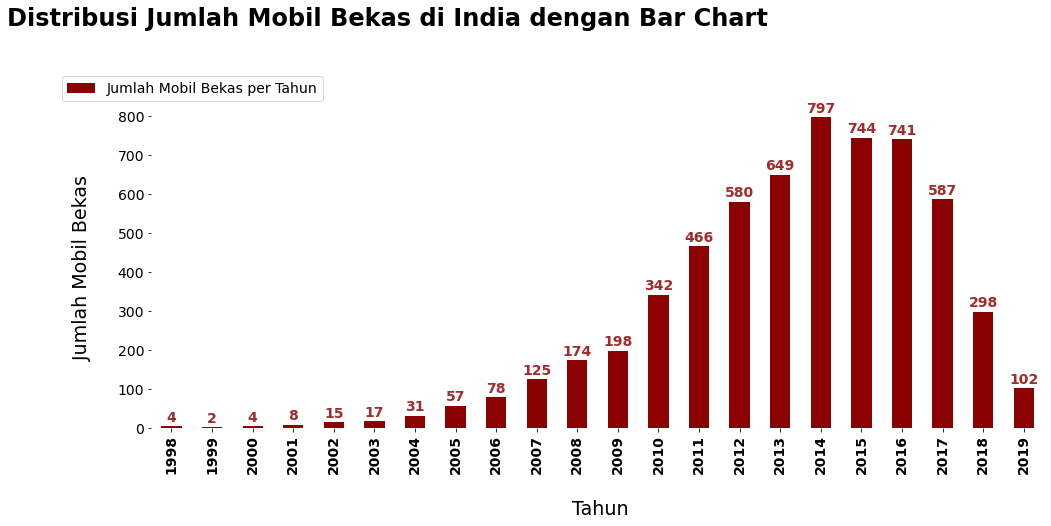

In [12]:
fig, axes = plt.subplots(1,1, figsize=(16, 6))
fig.suptitle("Distribusi Jumlah Mobil Bekas di India dengan Bar Chart", 
             x=0., y=1.1, fontsize=24, fontweight='bold', ha="left", color = "black")

y = tahun1["Jumlah Mobil Bekas"].plot(kind="bar", ax = axes, color="darkred", xlim=[0,900], fontsize = 14)
for p in y.patches:
    y.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', color = "brown", fontweight = 'bold', fontsize=14)
axes.set_xticklabels(list(tahun1.Tahun), color = "black", fontweight='bold')
axes.legend(["Jumlah Mobil Bekas per Tahun"], fontsize=14, bbox_to_anchor=(0.1, .1, 0.1, 1))
axes.set_ylabel("Jumlah Mobil Bekas \n", fontsize = 19)
axes.set_xlabel("\n Tahun", fontsize = 19)
axes.set_frame_on(False) #grid
fig.patch.set_facecolor('white')
plt.show()

Text(0.0, 1.1, 'Tren Jumlah Mobil Bekas di India dengan Line Chart')

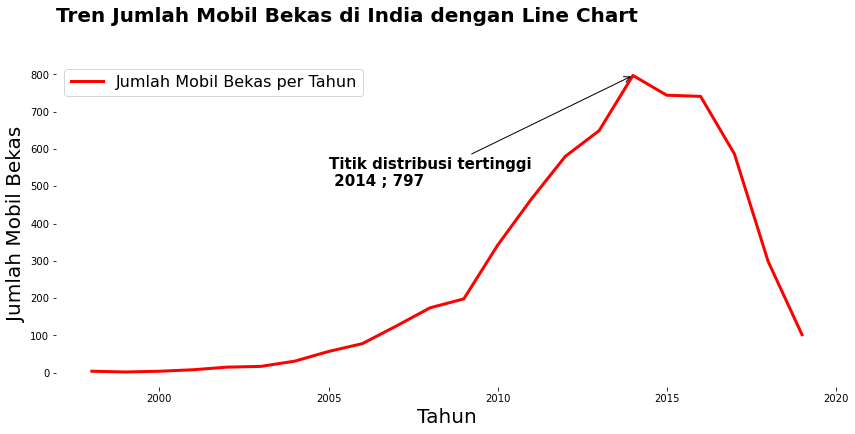

In [13]:
plt.figure(figsize=(14, 6))
splot=sns.lineplot(x="Tahun",y="Jumlah Mobil Bekas",data=tahun1, linewidth = 3, color = 'red')
sns.axes_style("darkgrid")
fig.patch.set_facecolor('xkcd:mint green')
plt.annotate('Titik distribusi tertinggi \n {} ; {}'.format(2014, 797) , 
            fontsize = 15, fontweight = "bold", xy=(2014, 797), xytext=(2005, 500),
            arrowprops=dict(arrowstyle="->", color = "black"))
plt.xlabel("Tahun", size=20, color = 'black')
plt.ylabel("Jumlah Mobil Bekas", size=20 , color = 'black')
plt.legend(["Jumlah Mobil Bekas per Tahun"], fontsize=16)
splot.set_frame_on(False) 
plt.title("Tren Jumlah Mobil Bekas di India dengan Line Chart", 
             x=0., y=1.1, fontsize=20, fontweight='bold', ha="left", color = 'black')

Terlihat bahwa jumlah mobil bekas di India mencapai puncaknya pada tahun 2014 sebanyak 797 unit. Terjadi peningkatan jumlah mobil bekas periode 1999 sampai 2014 kemudian mengalami penurunan sampai tahun 2019.

###### 4. Berapa banyak mobil yang memiliki total jarak pemakaian dibawah 100.000 km ?

In [14]:
km = df3[df3["Kilometers_Driven"]<100000]
print("Banyak mobil yang memiliki total jarak pemakaian dibawah 100.000 km ada {} unit."
      .format(km["Name"].value_counts().sum()))

Banyak mobil yang memiliki total jarak pemakaian dibawah 100.000 km ada 5470 unit.


###### 5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi ?

In [15]:
km_med = df3["Kilometers_Driven"].median()
km1 = df3[df3["Kilometers_Driven"]<km_med]
print("Median kilometer {}, jumlah {}".format(km_med, km1["Name"].value_counts().sum()))

Median kilometer 53000.0, jumlah 2987


Terlihat bahwa median dari Kilometer Driven adalah 53000 km. Menurut situs https://id.priceprice.com/, sebuah mobil yang normal umumnya mampu menempuh jarak mulai 15.000 km hingga 20.000 km. Kemudian jika jarak masih di angka 10.000 km saja dapat dipastikan jika mobil tersebut jarang digunakan. Sedangkan jika sudah menunjukkan angka 20.000 km maka bisa dibilang mobil tersebut sering dipakai. 

Sebuah mobil yang dalam usia 5 tahun dengan jarak tempuh 75.000 km hingga 100.000 km maka ini masih dibilang dalam pemakaian yang cukup wajar. Kemudian jika kurang dari 75.000 km maka dapat dipastikan mobil tersebut cukup jarang dipakai sehingga masih memiliki usia pemakaian yang lumayan panjang.

Mengacu pada dataset diatas, maka kilometer total jarak pemakaian bisa dikategorikan sebagai rendah ketika berada dibawah 53000 km yaitu sebanyak 2987 unit mobil bekas dan kategori tinggi ketika lebih dari 53000 km.

###### 6. Apakah terdapat outlier pada dataset tersebut ?

In [16]:
df3["Kilometers_Driven"].describe()

count    6.019000e+03
mean     5.873838e+04
std      9.126884e+04
min      1.710000e+02
25%      3.400000e+04
50%      5.300000e+04
75%      7.300000e+04
max      6.500000e+06
Name: Kilometers_Driven, dtype: float64

In [17]:
# Jumlah outlier Kilometers Driven
out1 = df3["Kilometers_Driven"].quantile(0.25) #q1
out2 = df3["Kilometers_Driven"].quantile(0.5) #median
out3 = df3["Kilometers_Driven"].quantile(0.75) #q2
out4 = out3-out1
# Minor outlier detection
out4a = out4*1.5
out5a,out5b = out1+out4a,out3+out4a
# Mayor outlier detection
out4b = out4*3
out6a,out6b = out1+out4b,out3+out4b

# Jumlah outlier Price
out1_price = df3["Price"].quantile(0.25) #q1
out2_price = df3["Price"].quantile(0.5) #median
out3_price = df3["Price"].quantile(0.75) #q2
out4_price = out3_price-out1_price
# Minor outlier detection
out4a_price = out4_price*1.5
out5a_price,out5b_price = out1_price+out4a_price,out3_price+out4a_price
# Mayor outlier detection
out4b_price = out4_price*3
out6a_price,out6b_price = out1_price+out4b_price,out3_price+out4b_price

# Jumlah outlier Engine
out1_en = df3["New_Engine"].quantile(0.25) #q1
out2_en = df3["New_Engine"].quantile(0.5) #median
out3_en = df3["New_Engine"].quantile(0.75) #q2
out4_en = out3_en-out1_en
# Minor outlier detection
out4a_en = out4_en*1.5
out5a_en,out5b_en = out1_en+out4a_en,out3_en+out4a_en
# Mayor outlier detection
out4b_en = out4_en*3
out6a_en,out6b_en = out1_en+out4b_en,out3_en+out4b_en

# Jumlah outlier Power
out1_po = df3["New_Power"].quantile(0.25) #q1
out2_po = df3["New_Power"].quantile(0.5) #median
out3_po = df3["New_Power"].quantile(0.75) #q2
out4_po = out3_po-out1_po
# Minor outlier detection
out4a_po = out4_po*1.5
out5a_po,out5b_po = out1_po+out4a_po,out3_po+out4a_po
# Mayor outlier detection
out4b_po = out4_po*3
out6a_po,out6b_po = out1_po+out4b_po,out3_po+out4b_po

In [18]:
# Outlier Minor
print("Jumlah outlier Kilometer Driven sebanyak {} \n".format(df3[df3["Kilometers_Driven"]>=out5b].shape[0]))
print("Jumlah outlier Price sebanyak {} \n".format(df3[df3["Price"]>=out5b_price].shape[0]))
print("Jumlah outlier Power sebanyak {} \n".format(df3[df3["New_Power"]>=out5b_po].shape[0]))
print("Jumlah outlier Engine sebanyak {} \n".format(df3[df3["New_Engine"]>=out5b_en].shape[0]))

Jumlah outlier Kilometer Driven sebanyak 202 

Jumlah outlier Price sebanyak 718 

Jumlah outlier Power sebanyak 238 

Jumlah outlier Engine sebanyak 61 



In [19]:
# Outlier Mayor
print("Jumlah outlier mayor Kilometer Driven sebanyak {} \n".format(df3[df3["Kilometers_Driven"]>=out6b].shape[0]))
print("Jumlah outlier mayor Price sebanyak {} \n".format(df3[df3["Price"]>=out6b_price].shape[0]))
print("Jumlah outlier mayor Power sebanyak {} \n".format(df3[df3["New_Power"]>=out6b_po].shape[0]))
print("Jumlah outlier mayor Engine sebanyak {} \n".format(df3[df3["New_Engine"]>=out6b_en].shape[0]))

Jumlah outlier mayor Kilometer Driven sebanyak 47 

Jumlah outlier mayor Price sebanyak 382 

Jumlah outlier mayor Power sebanyak 34 

Jumlah outlier mayor Engine sebanyak 20 



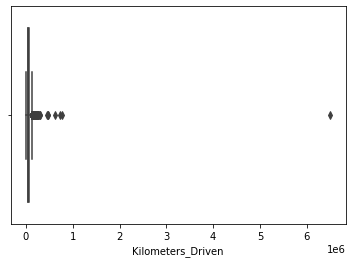

In [20]:
sns.boxplot(x=df3["Kilometers_Driven"])

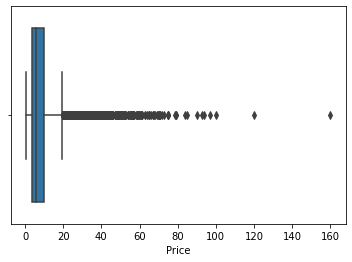

In [21]:
sns.boxplot(x=df3["Price"])

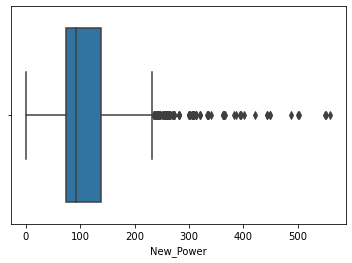

In [22]:
sns.boxplot(x=df3["New_Power"])

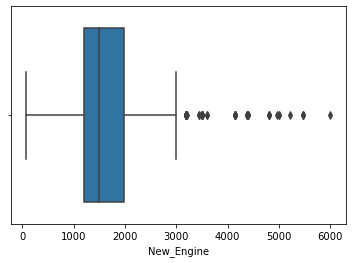

In [23]:
sns.boxplot(x=df3["New_Engine"])

###### 7. Apakah terdapat hubungan antar variabel ?

In [24]:
df3.corr().style.background_gradient(cmap='coolwarm')

,Year,Kilometers_Driven,Seats,Price,New_Engine,New_Power
Year,1.000000,-0.173048,0.012333,0.305327,-0.052197,0.071181
Kilometers_Driven,-0.173048,1.000000,0.083113,-0.011493,0.091068,0.024208
Seats,0.012333,0.083113,1.000000,0.052225,0.393337,0.108730
Price,0.305327,-0.011493,0.052225,1.000000,0.658354,0.759136
New_Engine,-0.052197,0.091068,0.393337,0.658354,1.000000,0.840934
New_Power,0.071181,0.024208,0.108730,0.759136,0.840934,1.000000


Pada bagian B, telah dimanipulasi data pada kolom Engine dan Power dan dikonversi tipe datanya menjadi numerik. Hal ini akan memudahkan dalam melihat hubungan secara numerik antar kolom tersebut. Korelasi dapat digunakan untuk melihat hubungan antar beberapa kolom numerik. 

Kekuatan hubungan korelasi dapat dibedakan sebagai berikut.
- 0           : Tidak ada korelasi
- 0.00 - 0.25 : Korelasi sangat lemah
- 0.25 - 0.50 : Korelasi cukup
- 0.50 - 0.75 : Korelasi kuat
- 0.75 - 0.99 : Korelasi sangat kuat
- 1           : Korelasi sempurna

Korelasi dapat menghasilkan nilai positif dan negatif. Jika korelasi menghasilkan nilai positif berarti terdapat hubungan searah yang artinya jika suatu variabel mengalami kenaikan maka variabel lain yang berhubungan akan mengalami kenaikan pula. Jika korelasi menghasilkan nilai negatif berarti terdapat hubungan berlawanan yang artinya jika suatu variabel mengalami kenaikan maka variabel lain yang berhubungan akan mengalami penurunan.

Berdasarkan tabel korelasi, diketahui bahwa hubungan Price dengan Power dan Engine dengan Power berkorelasi positif sangat kuat. Hal ini menunjukkan bahwa terdapat hubungan searah antar variabel tersebut. Sementara itu, Year dengan Kilometers Driven dan Year dengan Engine berkorelasi negatif sangat lemah. Hal ini menunjukkan bahwa terdapat hubungan berlawanan antar variabel tersebut.

###### 8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih ?

In [25]:
ot = df3[df3["Owner_Type"]!="First"]
ot2 = ot[ot["Owner_Type"]!="Second"]
print("Jumlah mobil yang merupakan kepemilikan ketiga atau lebih sebanyak {} unit.".
      format(ot2["Owner_Type"].value_counts().sum()))

Jumlah mobil yang merupakan kepemilikan ketiga atau lebih sebanyak 122 unit.


###### 9. Tipe bahan bakar apa saja yang memiliki mileage paling hemat ?

In [26]:
CNG = df3[df3["Fuel_Type"]=="CNG"]
Diesel = df3[df3["Fuel_Type"]=="Diesel"]
Petrol = df3[df3["Fuel_Type"]=="Petrol"]
LPG = df3[df3["Fuel_Type"]=="LPG"]
Electric = df3[df3["Fuel_Type"]=="ELectric"]

df3.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [27]:
CNG1 = CNG["Mileage"].str.replace("km/kg", "")
CNG2 = CNG1.astype(float)
CNG2.describe()

count    56.000000
mean     25.418036
std       5.953456
min      13.200000
25%      22.100000
50%      26.600000
75%      27.737500
max      33.540000
Name: Mileage, dtype: float64

In [28]:
Diesel1 = Diesel["Mileage"].str.replace("kmpl", "")
Diesel2 = Diesel1.astype(float)
Diesel2.describe()

count    3205.000000
mean       18.620484
std         4.962370
min         0.000000
25%        14.840000
50%        19.010000
75%        22.690000
max        28.400000
Name: Mileage, dtype: float64

In [29]:
LPG1 = LPG["Mileage"].str.replace("km/kg", "")
LPG2 = LPG1.astype(float)
LPG2.describe()

count    10.000000
mean     19.385000
std       5.340363
min      13.450000
25%      14.412500
50%      18.250000
75%      24.925000
max      26.200000
Name: Mileage, dtype: float64

In [30]:
Petrol1 = Petrol["Mileage"].str.replace("kmpl", "")
Petrol2 = Petrol1.astype(float)
Petrol2.describe()

count    2746.000000
mean       17.415204
std         3.819760
min         0.000000
25%        15.640000
50%        17.800000
75%        19.400000
max        26.000000
Name: Mileage, dtype: float64

In [31]:
Electric.describe()

,Year,Kilometers_Driven,Seats,Price,New_Engine,New_Power
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


Dapat dilihat terdapat 3 jenis bahan bakar pada mobil bekas sebagai berikut.
- Minyak : Diesel dan Petrol
- Gas : CNG dan LPG
- Listrik : Electric

Rata-rata pemakaian dari bahan bakar tersebut sebagai berikut.
- Diesel : 18.620484 kmpl
- Petrol : 17.415204 kmpl
- CNG : 25.418036 km/kg
- LPG : 19.385000 km/kg
- Electric : NaN

Sekilas jika membandingkan antara kelima bahan bakar diatas, terlihat bahwa pemakaian bahan bakar Petrol lebih hemat karena hanya mengonsumsi 17.415204 kmpl. Jika dibandingkan antara jenis minyak dan gas maka jenis minyak lebih hemat karena konsumsi bahan bakarnya lebih rendah dari jenis gas. 

Mengutip dari situs https://m.merdeka.com, menurut Wakil Direktur Utama PT Perusahaan Listrik Negara (PLN), untuk rata-rata mobil saat ini membutuhkan 1 liter BBM untuk jarak tempuh 10 km. Dimana harga bensin dan solar non subsidi sebesar Rp. 9.500 per liter, sehingga untuk jarak tempuh 10 km mobil membutuhkan biaya Rp. 9.500.

Sementara untuk jarak yang sama, mobil listrik hanya memperlakukan daya listrik sebesar 2 kilo watt hour (kWh) dimana tarif PLN sebesar Rp. 1.467 per kWh sehingga mobil listrik hanya membutuhkan biaya sebesar Rp. 2.934 per 10 km atau sekitar Rp. 3.000 per 10 km.

Sedemikian sehingga, jika ditarik kesimpulan maka mobil dengan bahan bakar listrik lebih hemat daripada bahan bakar minyak dan gas.

###### 10. Bagaimana  perbandingan 5 merek mobil bekas terbanyak dari tahun ke tahun ?

In [32]:
df3["Year"].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

In [33]:
maruti = df3[df3['Name'].str.match('^Maruti.*')== True]
maruti1 = maruti[["Name","Year"]]
hyundai = df3[df3['Name'].str.match('^Hyundai.*')== True]
hyundai1 = hyundai[["Name","Year"]]
honda = df3[df3['Name'].str.match('^Honda.*')== True]
honda1 = honda[["Name","Year"]]
toyota = df3[df3['Name'].str.match('^Toyota.*')== True]
toyota1 = toyota[["Name","Year"]]
mercedez = df3[df3['Name'].str.match('^Mercedez-Benz.*')== True]
mercedez1 = mercedez[["Name","Year"]]

In [34]:
mar = maruti1['Year'].value_counts()
hyu = hyundai1['Year'].value_counts()
hon = honda1['Year'].value_counts()
toy = toyota1['Year'].value_counts()
mer = mercedez1['Year'].value_counts()
data = pd.DataFrame({"Maruti":mar,"Hyundai":hyu,"Honda":hon,"Toyota":toy,"Mercedez":mer}).reset_index().sort_values(by="index")
dataa = data.rename(columns={"index":"Tahun"})

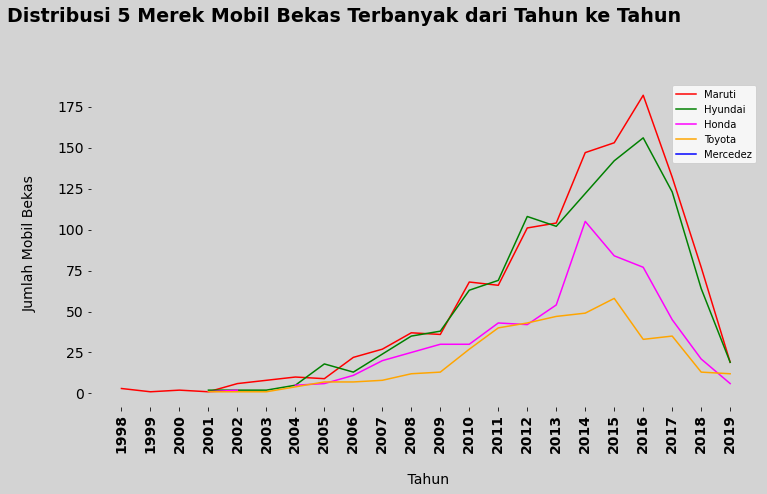

In [35]:
fig, b = plt.subplots(1,1, figsize=(12, 6))
fig.suptitle("Distribusi 5 Merek Mobil Bekas Terbanyak dari Tahun ke Tahun", 
             x=0.028, y=1.05, fontsize=19, fontweight='bold', ha="left", color = "black")

colors = ["red", "green", "magenta", "orange", "blue"]
line_widths = [ 3, 3, 3, 3, 3]
bue = range(0,200,25)
lp = dataa[["Maruti","Hyundai","Honda","Toyota","Mercedez"]].plot(kind="line", ax=b, 
                 color=colors, fontsize = 14, xticks=range(dataa.shape[0]))
b.set_xticklabels(list(dataa.Tahun), color = "black", fontweight='bold', rotation = 90)
b.set_xlabel("\n Tahun", fontsize = 14)
b.set_ylabel("Jumlah Mobil Bekas\n", fontsize=14)
b.spines["top"].set_color("none")
b.spines["right"].set_color("none")
b.spines["bottom"].set_color("none")
b.set_frame_on(False) #grid
fig.patch.set_facecolor('lightgrey')
plt.show()

###### 11. Bagaimana perbandingan 5 kota dengan mobil bekas terbanyak dari tahun ke tahun ?

In [36]:
mumbai = df3[df3["Location"].str.match('^Mumbai.*')== True]
mumbai1 = mumbai[["Location","Year"]]
hyderabad = df3[df3["Location"].str.match('^Hyderabad.*')== True]
hyderabad1 = hyderabad[["Location","Year"]]
kochi = df3[df3["Location"].str.match('^Kochi.*')== True]
kochi1 = kochi[["Location","Year"]]
coimbatore = df3[df3["Location"].str.match('^Coimbatore.*')== True]
coimbatore1 = coimbatore[["Location","Year"]]
pune= df3[df3["Location"].str.match('^Pune.*')== True]
pune1 = pune[["Location","Year"]]

In [37]:
mum = mumbai1['Year'].value_counts()
hyd = hyderabad1['Year'].value_counts()
koc = kochi1['Year'].value_counts()
coi = coimbatore1['Year'].value_counts()
pun = pune1['Year'].value_counts()
data2 = pd.DataFrame({"Mumbai":mum,"Hyderabad":hyd,"Kochi":koc,"Coimbatore":coi,"Pune":pun}).reset_index().sort_values(by="index")
data2a = data2.rename(columns={"index":"Tahun"})

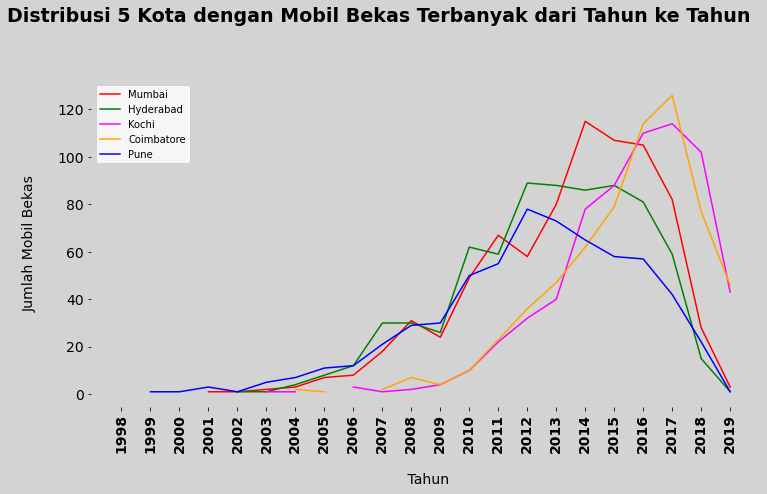

In [38]:
fig, c = plt.subplots(1,1, figsize=(12, 6))
fig.suptitle("Distribusi 5 Kota dengan Mobil Bekas Terbanyak dari Tahun ke Tahun", 
             x=0.028, y=1.05, fontsize=19, fontweight='bold', ha="left", color = "black")

colors = ["red", "green", "magenta", "orange", "blue"]
line_widths = [ 3, 3, 3, 3, 3]
bue = range(0,200,25)
lp = data2a[["Mumbai","Hyderabad","Kochi","Coimbatore","Pune"]].plot(kind="line", ax=c, 
                 color=colors, fontsize = 14, xticks=range(data2a.shape[0]))
c.set_xticklabels(list(data2a.Tahun), color = "black", fontweight='bold', rotation = 90)
c.set_xlabel("\n Tahun", fontsize = 14)
c.set_ylabel("Jumlah Mobil Bekas\n", fontsize=14)
c.spines["top"].set_color("none")
c.spines["right"].set_color("none")
c.spines["bottom"].set_color("none")
c.set_frame_on(False) #grid
fig.patch.set_facecolor('lightgrey')
plt.show()

###### 12. Bagaimana Hubungan Jenis Transmisi dengan Tipe Kepemilikan ?

In [39]:
manual = df3[df3["Transmission"].str.match('^Manual.*')== True]
manual1 = manual[["Transmission","Owner_Type"]]
automatic = df3[df3["Transmission"].str.match('^Automatic.*')== True]
automatic1 = automatic[["Transmission","Owner_Type"]]

In [40]:
man = manual1['Owner_Type'].value_counts()
aut = automatic1['Owner_Type'].value_counts()
data3 = pd.DataFrame({"Manual":man,"Automatic":aut}).reset_index().sort_values(by="Manual", ascending = False)
data3a = data3.rename(columns={"index":"Owner Type"})
data3a

,Owner Type,Manual,Automatic
0,First,3520,1409
1,Second,683,285
2,Third,88,25
3,Fourth & Above,8,1


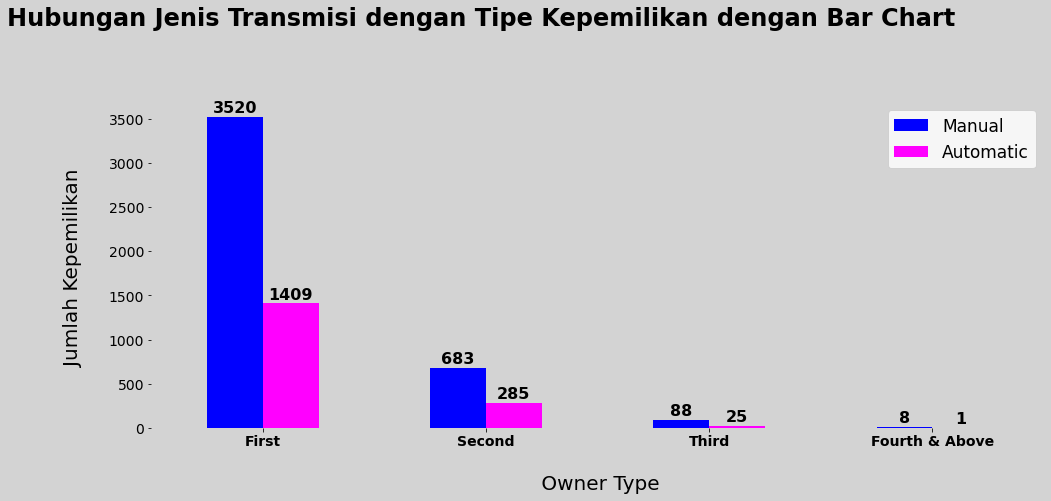

Deskripsi Jenis Kepemilikan Keempat dan Diatasnya


,Year,Kilometers_Driven,Seats,Price,New_Engine,New_Power
count,9.000000,9.000000,8.00000,9.000000,8.000000,8.000000
mean,2006.777778,135759.222222,6.25000,3.280000,1959.000000,91.937500
std,2.635231,83106.024243,1.38873,1.316378,612.288447,49.705157
min,2001.000000,59833.000000,5.00000,1.970000,1197.000000,0.000000
25%,2006.000000,77000.000000,5.00000,2.200000,1286.250000,73.750000
50%,2007.000000,90000.000000,6.00000,3.000000,2220.500000,91.000000
75%,2008.000000,227000.000000,7.25000,4.000000,2494.000000,112.250000
max,2010.000000,262000.000000,8.00000,5.500000,2499.000000,163.500000


In [41]:
fig, c = plt.subplots(1,1, figsize=(16, 6))
fig.suptitle("Hubungan Jenis Transmisi dengan Tipe Kepemilikan dengan Bar Chart", 
             x=0., y=1.1, fontsize=24, fontweight='bold', ha="left", color = "black")

y1 = data3a[["Manual","Automatic"]].plot(kind="bar", ax = c,
                                        color=("blue", "magenta"), xlim=[0,4000], fontsize = 14)
for p1 in y1.patches:
    y1.annotate(format(p1.get_height()), 
                   (p1.get_x() + p1.get_width() / 2., p1.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points', color = "black", fontweight = 'bold', fontsize=16)
c.set_xticklabels(list(data3a["Owner Type"]), color = "black", fontweight='bold', rotation = 0)
c.set_frame_on(False) #grid
c.set_ylabel("Jumlah Kepemilikan \n", fontsize = 20)
c.set_xlabel("\n Owner Type", fontsize = 20)
fig.patch.set_facecolor('lightgrey')
c.legend(fontsize=17)
plt.show()
print("Deskripsi Jenis Kepemilikan Keempat dan Diatasnya")
df3[df3["Owner_Type"]=="Fourth & Above"].describe()

Terlihat bahwa mobil bekas dengan tipe kepemilikan pertama tersedia lebih banyak dan sebaliknya tipe kepemilikan keempat sangat sedikit bahkan untuk transmisi automatic hanya 1 unit. Hal ini disebabkan terlalu seringnya pemakaian mobil bekas tersebut. Hal tersebut dapat dilihat bahwa Kilometers Driven minimum menyentuh angka 59.833 km dan termasuk ke dalam kategori pemakaian tinggi.

###### 13. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India ?
Untuk mengetahui faktor-faktor yang berpengaruh terhadap harga mobil (Price) dapat menggunakan algoritma regresi linear. Sebelumnya, terlihat bahwa terdapat korelasi positif antara Price dengan Engine dan Price dengan Power. Diduga Engine dan Power mempengaruhi Price mobil bekas di India. Maka dari itu akan dianalisis apakah Engine dan Power mempengaruhi Price pada mobil bekas di India.

Dalam analisis ini, akan menggunakan dataframe yang telah dimanipulasi sebelumnya. Namun masih terdapat missing data didalamnya dan akan dilakukan data cleansing. 

###### Data Cleansing
1. Mengisi missing value dengan median
2. Mengatasi outlier dengan menghilangkan data outlier

In [42]:
# Mengatasi missing value
df4 = df3[["Price", "New_Engine", "New_Power"]]
for col in list(df4.columns):
    med = df4[col].median()
    df4[col].fillna(med, inplace = True)

# Mengatasi outlier
man_pri = df4["Price"].mask(df4["Price"] > out5b_price, out5b_price)
man_en = df4["New_Engine"].mask(df4["New_Engine"] > out5b_en, out5b_en)
man_po = df4["New_Power"].mask(df4["New_Power"] > out5b_po, out5b_po)

data_man = pd.DataFrame({"Price":man_pri,"Engine":man_en,"Power":man_po})
df4a = df4.drop(columns ={"New_Engine","New_Power","Price"})
df4b = df4a.join(data_man)
df5 = df4b.dropna()
df5.describe(), df5.info()

C:\Users\Julz\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   6019 non-null   float64
 1   Engine  6019 non-null   float64
 2   Power   6019 non-null   float64
dtypes: float64(3)
memory usage: 188.1 KB


(             Price       Engine        Power
 count  6019.000000  6019.000000  6019.000000
 mean      7.708463  1612.647782   109.315434
 std       5.769853   568.865725    48.910594
 min       0.440000    72.000000     0.000000
 25%       3.500000  1198.000000    74.000000
 50%       5.640000  1493.000000    92.700000
 75%       9.950000  1969.000000   138.030000
 max      19.625000  3163.000000   234.250000,
 None)

###### Exploratory Data Analysis

Figure(432x288) Figure(432x288) Figure(432x288)


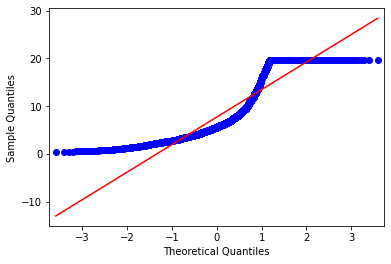

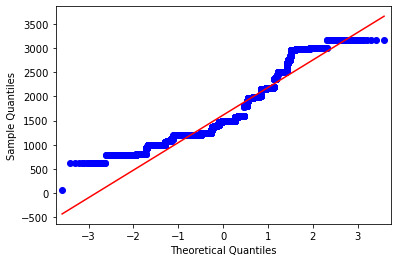

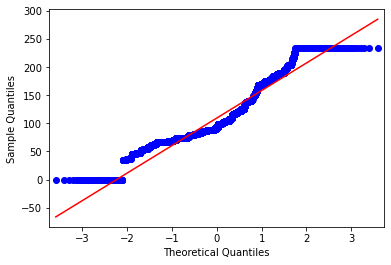

In [43]:
print(qqplot(df5["Price"], line='s'), qqplot(df5["Engine"], line='s'), qqplot(df5["Power"], line='s'))

Berdasarkan QQPlot, terlihat bahwa terjadi penyimpangan sangat nyata pada Price, Engine, dan Power. Hal ini mengindikasikan bahwa data tidak berdistribusi normal. Maka dari itu, data akan ditransformasi dengan StandardScaler pada Skelarn.

###### Data Preprocessing

In [44]:
stand = preprocessing.StandardScaler() #z-zcore
df6 = pd.DataFrame(stand.fit_transform(df5), columns = df5.columns)

x, y = df6[["Engine", "Power"]], df6[["Price"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

LR = LinearRegression().fit(x_train,y_train)
y_train_pred_LR = LR.predict(x_test)

xa = sma.add_constant(x)
reg = sma.OLS(y,xa).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     5552.
Date:                Thu, 27 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:47:14   Log-Likelihood:                -5393.1
No. Observations:                6019   AIC:                         1.079e+04
Df Residuals:                    6016   BIC:                         1.081e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.186e-17      0.008  -1.07e-14      1.000      -0.015       0.015
Engine         0.1491      0.014     10.916      0.000       0.122       0.176
Power          0.6775      0.014     49.610      0.000       0.651       0.704
==============================================================================
Omnibus:                      188.555   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              477.964
Skew:                           0.100   Prob(JB):                    1.63e-104
Kurtosis:                       4.366   Cond. No.                         3.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Setelah ditransformasi dan diuji dengan regresi linear, R squared menunjukkan nilai 0.649 yang artinya 64,9% keragaman Price dijelaskan oleh keragaman Engine dan Power sedangkan sisanya dipengaruhi oleh keragaman lain yang tidak dimasukkan kedalam model.

Namun terlihat bahwa model masih mengindikasikan tidak berdistribusi normal. Hal tersebut dapat dilihat pada Prob(JB) yang bernilai 1.63e-104 < 0.05. Hal ini memungkinkan bahwa model ini bukanlah model yang terbaik.

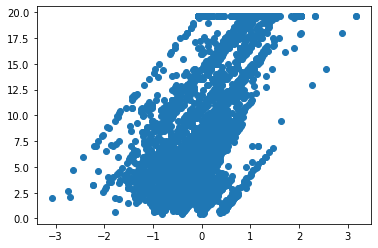

In [45]:
plt.scatter(x = reg.resid, y = df5.Price)
plt.show()

In [46]:
error1_MAPE = sm.mean_absolute_error(y_test,y_train_pred_LR)*100
error1_MSE = sm.mean_squared_error(y_test,y_train_pred_LR)*100
print(error1_MAPE, error1_MSE)

44.477881682857564 35.50697749782654


Dalam plot scatter juga menunjukkan grafik yang cenderung naik keatas yang mengindikasikan bahwa terjadi penyimpangan terhadap persamaan regresi dan tidak memenuhi asumsi regresi. Selain itu nilai errornya juga sangat besar. Dengan menggunakan metode MAPE diperoleh error sebesar 44,47% dan dengan metode MSE diperoleh error sebesar 35,5%.